# RumEval19 Twitter data

Explore variations between and within rumours.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import pickle as pc
import dateutil.parser
from glob import glob
import json
import codecs

# Tokenizer
from nltk.tokenize.api import StringTokenizer
from nltk.tokenize import TweetTokenizer

# Text representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualizers
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt

# Set font size
fS = 25

In [3]:
# Load

# Load numpy array
wemb = np.load('rumeval19.npy')

# Load frame
data = pd.read_csv('./RumEval19_emb.csv', sep='\t', encoding='utf-8')

In [4]:
data

,created_date,created_datetime,id,label,reply_ix,rumour,text,thread_ix,embedding
0,2015-01-07,2015-01-07 11:28:49+00:00,552788945017516032,support,0.0,charliehebdo,Appalled by the attack on Charlie Hebdo in Par...,0.0,"[0.008491664621978999, -0.0044419903587549926,..."
1,2015-01-07,2015-01-07 12:01:13+00:00,552797099138748416,query,1.0,charliehebdo,@katherine1924 @Mumbobee @tnewtondunn @mehdirh...,0.0,"[0.013852698422851972, -0.006054305398720317, ..."
2,2015-01-07,2015-01-07 11:40:59+00:00,552792005559189504,comment,2.0,charliehebdo,@tnewtondunn @mehdirhasan attacking religion ...,0.0,"[0.02889420246509345, -0.009080388436191961, -..."
3,2015-01-07,2015-01-07 11:58:32+00:00,552796424266854400,comment,3.0,charliehebdo,@m33ryg @tnewtondunn @mehdirhasan Can you supp...,0.0,"[0.041592073523335986, 0.0022179222820947566, ..."
4,2015-01-07,2015-01-07 11:52:24+00:00,552794881601859584,comment,4.0,charliehebdo,@m33ryg @tnewtondunn @mehdirhasan You think pe...,0.0,"[0.005388239709039529, -0.012082802204531617, ..."
5,2015-01-07,2015-01-07 11:29:22+00:00,552789083211460608,comment,5.0,charliehebdo,@tnewtondunn You guys should put one of their ...,0.0,"[0.014793829717250033, -0.01300924343310974, 0..."
6,2015-01-07,2015-01-07 11:31:54+00:00,552789720540119040,comment,6.0,charliehebdo,"@mjhsinclair @tnewtondunn Sadly, since none of...",0.0,"[0.028495523367861385, -0.0031348781730661072,..."
7,2015-01-07,2015-01-07 12:04:05+00:00,552797821188206592,comment,7.0,charliehebdo,@UnbiasedF If you go into such facts it will b...,0.0,"[0.011515218049994317, 0.010205694803454238, -..."
8,2015-01-07,2015-01-07 11:59:36+00:00,552796692995907584,comment,8.0,charliehebdo,@m33ryg @Mumbobee @tnewtondunn @mehdirhasan Th...,0.0,"[0.012455027378899487, 0.018176963202054856, -..."
9,2015-01-07,2015-01-07 11:33:15+00:00,552790062778548224,comment,9.0,charliehebdo,@tnewtondunn solidarity is key - we can't be m...,0.0,"[0.01863154557844003, -0.018186607398092747, -..."


## Check day-to-day variation within a rumour

In [40]:
# Split out 1 rumour
data1 = data.loc[data['rumour'] == 'charliehebdo']
rumour_ix = (data['rumour'] == 'charliehebdo').values[:-1]
X = wemb[rumour_ix,:]
y = data1['label'].values
labels = np.unique(y)

In [41]:
# Get dates
dates_ = data1['created_date'].values
dates = np.unique(dates_)
for date in dates[:-1]:
    print(date)

2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11


In [42]:
# Impute NaN's
X[np.isnan(X)] = 0

In [43]:
# Run PCA
Xp2 = PCA(n_components=2).fit_transform(X)

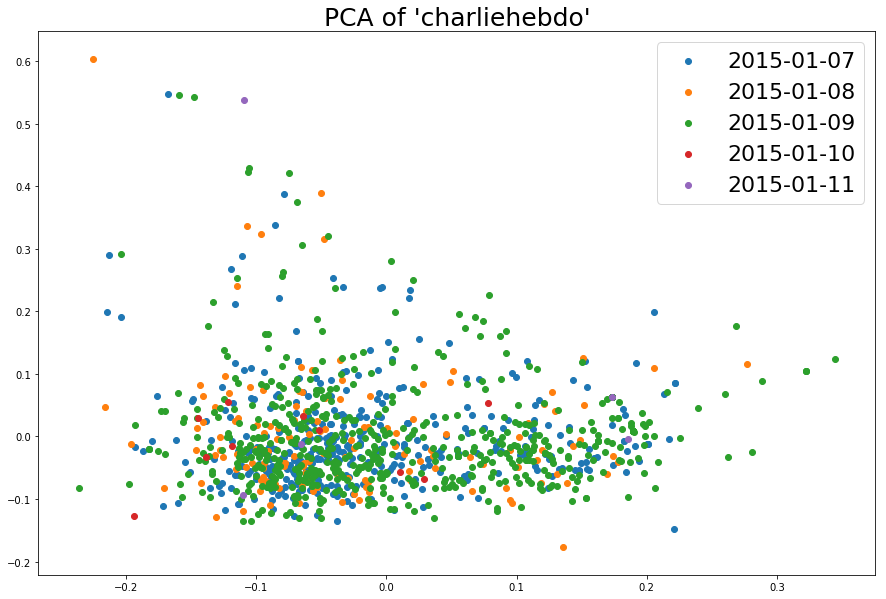

In [44]:
# Set up figure
fig, ax = plt.subplots(figsize=(15,10))

# Scatter outcome
for date in dates[:-1]:
    ax.scatter(Xp2[dates_ == date,0], Xp2[dates_ == date, 1], label=date)
    
ax.set_title('PCA of \'charliehebdo\'', fontsize=fS)
plt.legend(fontsize=fS-3)
fig.savefig('PCA_charliehebdo.png', bbox_inches='tight', pad_inches=0.0)

In [50]:
# Run t-SNE
ix = (np.sum(X, axis=1) != 0)
Xt2 = TSNE(verbose=1).fit_transform(X[ix, :])
yt2 = y[ix]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1121 samples in 0.011s...
[t-SNE] Computed neighbors for 1121 samples in 1.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1121
[t-SNE] Computed conditional probabilities for sample 1121 / 1121
[t-SNE] Mean sigma: 0.083352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.655510
[t-SNE] Error after 1000 iterations: 1.617040


In [52]:
labels

array(['comment', 'deny', 'query', 'support'], dtype=object)

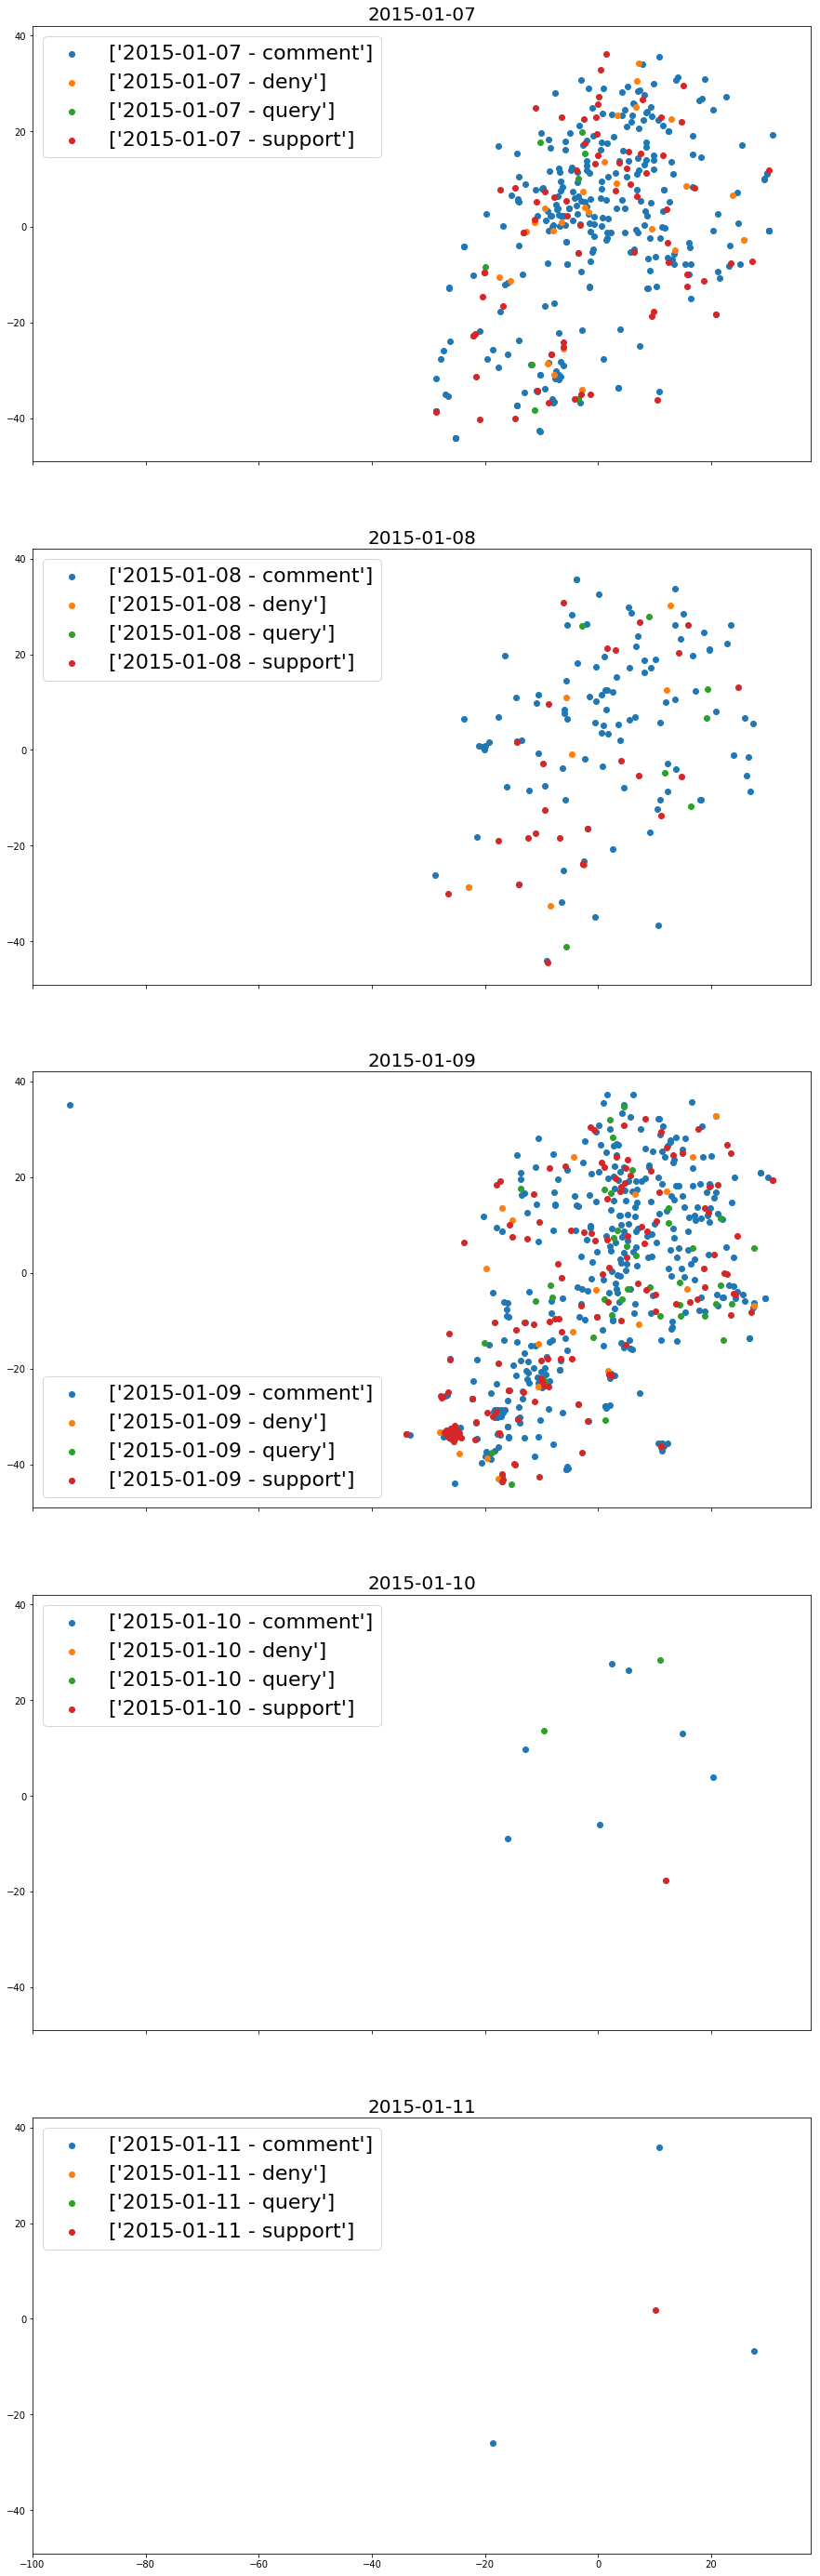

In [62]:
# Set up figure
fig, ax = plt.subplots(nrows=len(dates[:-1]), sharex=True, sharey=True, figsize=(15,50))

# fig.supertitle('t-SNE of \'charliehebdo\'', fontsize=fS - 5)

dates_ix = dates_[ix]

# Scatter outcome
for d, date in enumerate(dates[:-1]):
    
    # Data for current date
    Xd = Xt2[dates_ix == date, :]
    
    # Label for current date
    yd = yt2[dates_ix == date]
    
    for label in labels:
            
        # scatter tweets
        ax[d].scatter(Xd[yd == label,0], Xd[yd == label, 1], label=[date + ' - ' + label])
    
    ax[d].set_title(date, fontsize=fS-5) 
    ax[d].legend(fontsize=fS-3)
    
fig.savefig('tSNE_charliehebdo.png', bbox_inches='tight', pad_inches=0.0);

## Check variation between rumours

In [20]:
X = wemb

# Impute NaN's
X[np.isnan(X)] = 0

In [21]:
# Get rumours
rumours_ = data['rumour'].values[:-1].astype('str')
rumours = np.unique(rumours_)
for rumour in rumours:
    print(rumour)

charliehebdo
ebola-essien
ferguson
germanwings-crash
illary
nan
ottawashooting
prince-toronto
putinmissing
sydneysiege


In [22]:
# Run PCA
Xp2 = PCA(n_components=2).fit_transform(X)

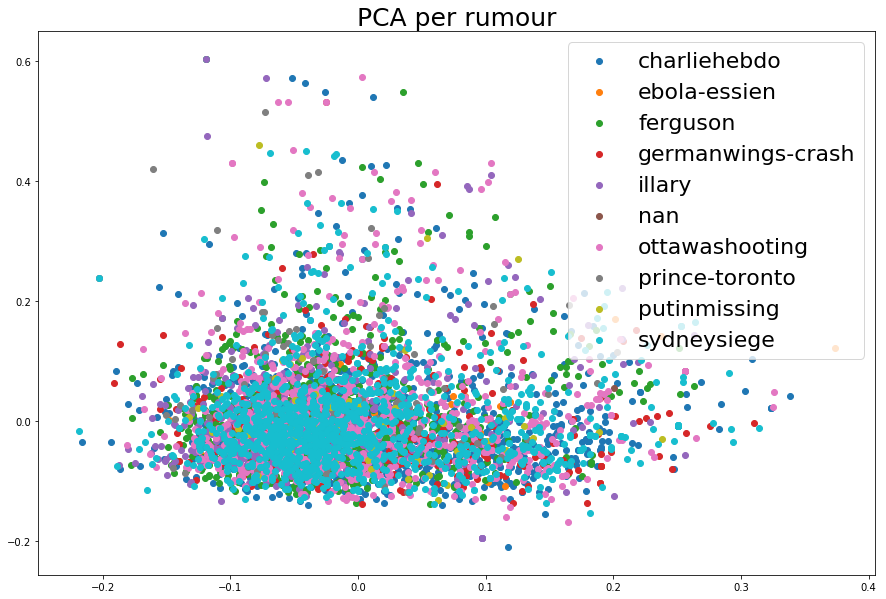

In [23]:
# Set up figure
fig, ax = plt.subplots(figsize=(15,10))

# Scatter outcome
for rumour in rumours:
    ax.scatter(Xp2[rumours_ == rumour,0], Xp2[rumours_ == rumour, 1], label=rumour)
    
ax.set_title('PCA per rumour', fontsize=fS)
plt.legend(fontsize=fS-3)
fig.savefig('PCA_rumours.png', bbox_inches='tight', pad_inches=0.0)

In [24]:
# Run t-SNE
ix = (np.sum(X, axis=1) != 0)
Xt2 = TSNE(verbose=1).fit_transform(X[ix, :])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5412 samples in 0.076s...
[t-SNE] Computed neighbors for 5412 samples in 29.964s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5412
[t-SNE] Computed conditional probabilities for sample 2000 / 5412
[t-SNE] Computed conditional probabilities for sample 3000 / 5412
[t-SNE] Computed conditional probabilities for sample 4000 / 5412
[t-SNE] Computed conditional probabilities for sample 5000 / 5412
[t-SNE] Computed conditional probabilities for sample 5412 / 5412
[t-SNE] Mean sigma: 0.069726
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.069405
[t-SNE] Error after 1000 iterations: 2.765259


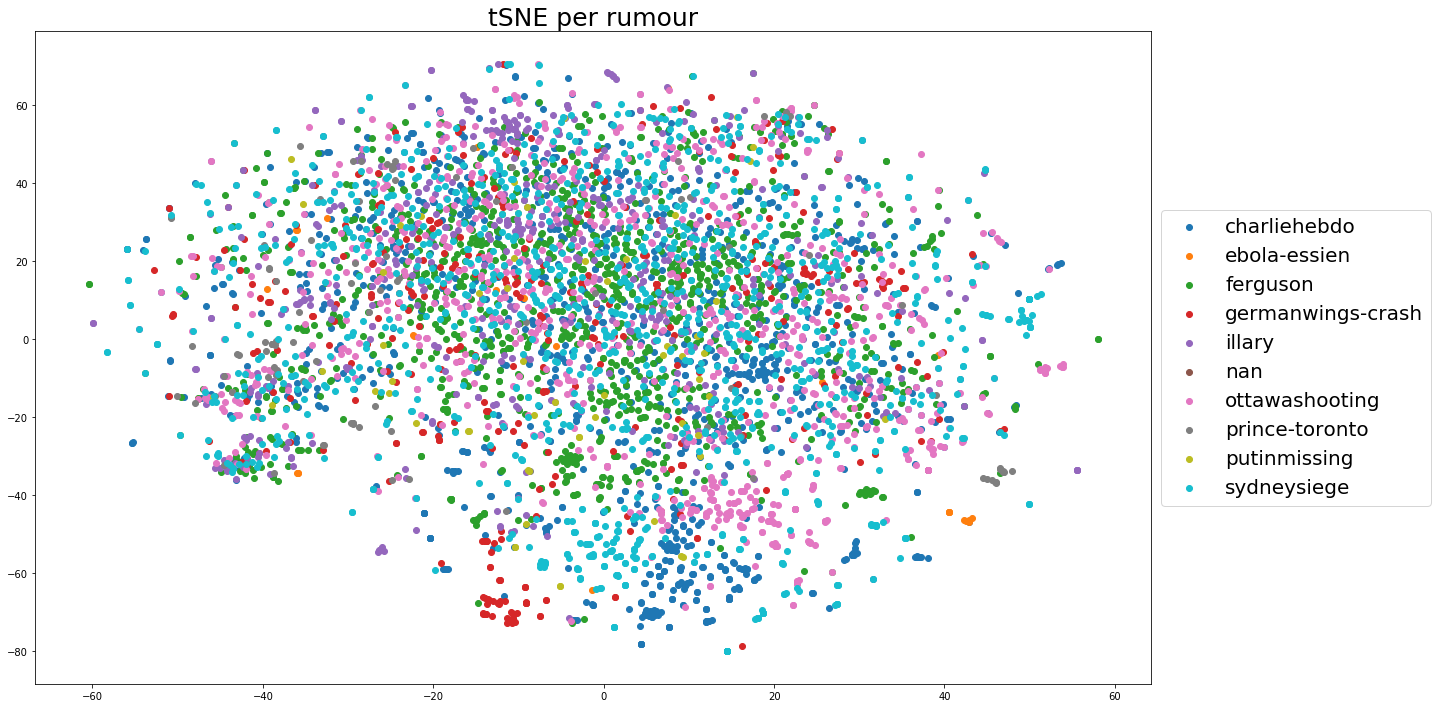

In [25]:
# Set up figure
fig, ax = plt.subplots(figsize=(20,12))

rumours_ix = rumours_[ix]

# Scatter outcome
for rumour in rumours:
    ax.scatter(Xt2[rumours_ix == rumour,0], Xt2[rumours_ix == rumour, 1], label=rumour)
    
ax.set_title('tSNE per rumour', fontsize=fS)
plt.legend(fontsize=fS-5, loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.savefig('tSNE_rumours.png', bbox_inches='tight', pad_inches=0.0)